In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

### 1. td/nstep/error – n-step TD error as sum of TD errors.
Show that the n-step error $G_{t:t + n} - V_{t + n - 1}(S_t)$ in the n-step TD update
\begin{equation*}
    V_{t + n}(S_t) = V_{t + n - 1}(S_t) + \alpha(G_{t:t + n} - V_{t + n - 1}(S_t))
\end{equation*}
can be written as a sum of TD errors
\begin{equation*}
    \delta_t := R_{t + 1} + \gamma V(S_{t + 1}) - V(S_t)
\end{equation*}
assuming that the value estimates never change.

We have:
\begin{equation*}
G_{t:t + n} := R_{t + 1} + \gamma R_{t + 2} + \dots + \gamma^{n - 1} R_{t + n} + \gamma^n V(S_{t + n}) 
\end{equation*}

Then we can add and subtract $V(S_{t + 1})$ recursively to create TD error terms:
\begin{align*}
G_{t:t + n} - V(S_t) &= R_{t + 1} + \gamma R_{t + 2} + ... + \gamma^{n - 1} R_{t + n} + \gamma^n V(S_{t + n}) - V(S_t) \\
G_{t:t + n} - V(S_t) &= R_{t + 1} + \gamma R_{t + 2} + ... + \gamma^{n - 1} R_{t + n} + \gamma^n V(S_{t + n}) - V(S_t) + \gamma V(S_{t + 1}) - \gamma V(S_{t + 1}) \\
G_{t:t + n} - V(S_t) &= R_{t + 1} + \gamma R_{t + 2} + ... + \gamma^{n - 1} R_{t + n} + \gamma^n V(S_{t + n}) - V(S_t) + \gamma V(S_{t + 1}) - \gamma V(S_{t + 1}) + \gamma^2 V(S_{t + 2}) - \gamma^2 V(S_{t + 2}) \\
\ldots
\end{align*}

After regrouping we have:
\begin{equation*}
    G_{t:t + n} - V(S_t) = [R_{t + 1} + \gamma V(S_{t + 1}) - V(S_t)] + \gamma [R_{t + 2} + \gamma V(S_{t + 2}) - V(S_{t + 1})] + \dots + \gamma^{n - 1} [R_{t + n} + \gamma V(S_{t + n}) - V(S_{t + n - 1})]
\end{equation*}

Each term is TD error $\delta_t$ therefore we can write:
\begin{equation*}
    G_{t:t + n} - V(S_t) = \sum_{k = t}^{\min(t + n, T) - 1} \gamma^{k - t}\delta_k
\end{equation*}



### 2. td/nstep/sarsa – n-step SARSA error as sum of TD errors.
Show that the n-step return of SARSA
\begin{equation*}
    G_{t:t + n} := R_{t + 1} + \gamma R_{t + 2} + \dots + \gamma^{n - 1} R_{t + n} + \gamma^n Q_{t + n - 1} (S_{t + n}, A_{t + n})
\end{equation*}
is equal to
\begin{equation*}
    G_{t:t + n} = Q_{t - 1}(S_t, A_t) + \sum_{k = t}^{\min(t + n, T) - 1} \gamma^{k - t}\delta_k
\end{equation*}
where
\begin{equation*}
    \delta_k := R_{k + 1} + \gamma Q_k(S_{k + 1}, A_{k + 1}) - Q_{k - 1}(S_k, A_k)
\end{equation*}

Firstly we can find return from error:
\begin{equation*}
    R_{k + 1} := \delta_k - \gamma Q_k(S_{k + 1}, A_{k + 1}) + Q_{k - 1}(S_k, A_k)
\end{equation*}
Then plugging into equation of n-step return SARSA we have:
\begin{equation*}
    G_{t:t + n} = [\delta_t - \gamma Q_t(S_{t + 1}, A_{t + 1}) + Q_{t - 1}(S_t, A_t)]  + \dots + \gamma^{n - 1} [\delta_{t + n - 1} - \gamma Q_{t + n - 1}(S_{t + n}, A_{t + n}) + Q_{t + n - 2}(S_{t + n - 1}, S_{t + n - 1})] + \gamma^n Q_{t + n - 1}(S_{t + n}, A_{t + n})
\end{equation*}
All intermediate terms cancel out so we have:
\begin{equation*}
    G_{t:t + n} = \delta_t + \gamma \delta_{t + 1} + \dots + \gamma^{n - 1} \delta_{t + n - 1} + Q_{t - 1}(S_t, A_t)
\end{equation*}
Therefore we can write:
\begin{equation*}
    G_{t:t + n} = Q_{t - 1}(S_t, A_t) + \sum_{k = t}^{\min(t + n, T) - 1} \gamma^{k - t}\delta_k
\end{equation*}

### 3. approx/poly – Orthogonal polynomials.
Give at least three kinds of (multivariate) orthogonal polynomials and discuss their respective advantages and disadvantages for approximating state-value and action-value functions.

- Legendre Polynomials 
    
    Univariate Legendre polynomials $P_n(x)$ are orthogonal on the interval $[-1, 1]$ with weight function $w(x) = 1$, multivariate are just tensor products $P_{n_1, n_2}(x, y) = P_{n_1}(x)P_{n_2}(y)$
    Advantages: Smooth, uniformly distributed inputs; Disadvantages: Curse of dimensionality, underrepresented edges
    
    \begin{equation*}
        P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} [(x^2 - 1)^n]
    \end{equation*}

- Chebyshev Polynomials

    Chebyshev polynomials of the first kind $T_n(x)$ are orthogonal on the interval $[-1, 1]$ with weight function $w(x) = \frac{1}{\sqrt{1 - x^2}}$, multivariate again tensor products
    Advantages: Minimax property - among all polynomials of a given degree, Chebyshev polynomials minimize the maximum approximation error; Disadvantages: Poor for uniform data, singular at edges

    \begin{equation*}
        T_{n + 1}(x) = 2x T_n(x) - T_{n - 1}(x)
    \end{equation*}
- Hermite Polynomials

    Hermite polynomials $H_n(x)$ are orthogonal with respect to the Gaussian weight $w(x) = e^{-x^2}$ over $\mathbb{R}$
    Advantages: Ideal for domains with Gaussian-like distributions, unbounded domains; Disadvantages: more computationally expensive, poor for uniform distributions

    \begin{equation*}
        H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n}(e^{-x^2})
    \end{equation*}  

### 4. approx/hashing – Tile coding using hashing.
Explain at least one hashing algorithm and how it can be applied to tile (coarse) coding.

Modulo hashing:
\begin{equation*}
    h(x) = (ax + b) \mod m
\end{equation*}
where $a, b$ are constants, $x$ is input and $m$ is size of feature vector. 

For example we have 2D continious state space and predefined number of tiles. We can choose also an offset for each of these tiles. Then our input into hash function, that is $x$ becomes (tile_index, tile_x, tile_y). We calculate value of $h(x)$ and put binary 1 into that value. In the end we would get sparse binary coded feature vector with number of 1s that is number of tiles. 

### 5. lstd – Least-squares temporal difference (programming).
Implement least-squares temporal difference and apply it to one of the environments you have already implemented. What are your feature vectors? Use an iterative solver (from a linear-algebra software library) for the linear system $\hat{A_t}w_t = b_t$. In the case of a control problem, explore what happens when you update the weight vector $w_t$ periodically and not in every time step. Finally, compare the performance to at least one other control algorithm you have already implemented.

In [2]:
class CliffWalking:
    def __init__(self, width=12, height=4):
        self.height = height
        self.width = width
        self.start = (height - 1, 0)
        self.goal = (height - 1, width - 1)
        self.cliff = [(height - 1, i) for i in range(1, width - 1)]  # the cliff region
        self.actions = ['up', 'down', 'left', 'right'] 
        self.state = self.start # current state
        self.rewards = -1  # constant reward of -1 for each step
        self.state_values = np.zeros((width, height))
        self.action_space = len(self.actions)

    def reset(self):
        self.state = self.start
        return self.state

    def is_terminal(self, state):
        return state == self.goal

    def step(self, action): # make one step in the environment S_t, A_t -> R_t, S'_t
        if self.state in self.cliff:
            return self.start, -100  # if you step on a cliff -> go back to the start with -100 reward 

        # calculate next position based on current state and action
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.height - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.width - 1)

        next_state = (x, y)
        # check if the next state is the cliff
        if next_state in self.cliff:
            self.reset()
            return self.start, -100

        self.state = next_state
        return next_state, self.rewards # const -1

In [3]:
def run_episode(gridworld, max_trials):
    state = gridworld.reset() # come to the start
    total_reward = 0
    steps = []
    while not gridworld.is_terminal(state): # as long as the goal isn't reached
        action = np.random.choice(gridworld.actions)  # random policy for demonstration
        next_state, reward = gridworld.step(action)
        total_reward += reward
        steps.append((state, action))
        state = next_state
        if state == gridworld.start and reward == -100:
            print("Fell into the cliff, back to start. Current reward: ", total_reward)
        if gridworld.is_terminal(state):
            print("Reached goal, episode ends. Final reward: ", total_reward)
            break
        # not cliff, not goal -> just continue moving
    return total_reward, steps

cliff_grid_world = CliffWalking(width=12, height=4)
episode_reward, steps = run_episode(cliff_grid_world, max_trials=20)

Fell into the cliff, back to start. Current reward:  -107
Fell into the cliff, back to start. Current reward:  -207
Fell into the cliff, back to start. Current reward:  -307
Fell into the cliff, back to start. Current reward:  -411
Fell into the cliff, back to start. Current reward:  -514
Fell into the cliff, back to start. Current reward:  -614
Fell into the cliff, back to start. Current reward:  -744
Fell into the cliff, back to start. Current reward:  -844
Fell into the cliff, back to start. Current reward:  -944
Fell into the cliff, back to start. Current reward:  -1052
Fell into the cliff, back to start. Current reward:  -1152
Fell into the cliff, back to start. Current reward:  -1279
Fell into the cliff, back to start. Current reward:  -1379
Fell into the cliff, back to start. Current reward:  -1479
Fell into the cliff, back to start. Current reward:  -1581
Fell into the cliff, back to start. Current reward:  -1691
Fell into the cliff, back to start. Current reward:  -1791
Fell i

In [4]:
def encode_state(state, gridworld):
    """
    Encode the state using one-hot encoding. Matrix of zeroes, just the current agent's position has value 1. 
    Then, flatten to obtain 1D vector.
    This is how we define feature vector: x(s) = encode_state(s)
    """
    encoded_state = np.zeros((gridworld.height, gridworld.width))
    encoded_state[state[0], state[1]] = 1
    return encoded_state.flatten()

In [5]:
from scipy.linalg import pinv

def lstd_control(gridworld, num_episodes, update_frequency=1, gamma=0.99, epsilon=0.01):
    d = gridworld.height * gridworld.width  # dimensionality of the feature vectors (=number of states, because of simplicity)
    A = np.zeros((d, d))  
    b = np.zeros(d)  
    w = np.zeros(d)  # weight vector w
    
    for episode in range(num_episodes):
        print(f"Episode: {episode} started.")
        state = gridworld.reset()
        x = encode_state(state, gridworld)
        time_step = 0  # time step counter
        while not gridworld.is_terminal(state): # for each step in episode
            action = np.random.choice(gridworld.action_space)  # randomly choose action
            next_state, reward = gridworld.step(gridworld.actions[action])
            x_next = encode_state(next_state, gridworld)
            A += np.outer(x, x - gamma * x_next)
            b += reward * x
            x = x_next
            state = next_state
            time_step += 1

            if time_step % update_frequency == 0:  # update weight vector periodically
                w = np.dot(pinv(A), b)
    
    return w

In [7]:
cliff_grid_world = CliffWalking(width=12, height=4)
weights = lstd_control(cliff_grid_world, num_episodes=100, update_frequency=1)

Episode: 0 started.
Episode: 1 started.
Episode: 2 started.
Episode: 3 started.
Episode: 4 started.
Episode: 5 started.
Episode: 6 started.
Episode: 7 started.
Episode: 8 started.
Episode: 9 started.
Episode: 10 started.
Episode: 11 started.
Episode: 12 started.
Episode: 13 started.
Episode: 14 started.
Episode: 15 started.
Episode: 16 started.
Episode: 17 started.
Episode: 18 started.
Episode: 19 started.
Episode: 20 started.
Episode: 21 started.
Episode: 22 started.
Episode: 23 started.
Episode: 24 started.
Episode: 25 started.
Episode: 26 started.
Episode: 27 started.
Episode: 28 started.
Episode: 29 started.
Episode: 30 started.
Episode: 31 started.
Episode: 32 started.
Episode: 33 started.
Episode: 34 started.
Episode: 35 started.
Episode: 36 started.
Episode: 37 started.
Episode: 38 started.
Episode: 39 started.
Episode: 40 started.
Episode: 41 started.
Episode: 42 started.
Episode: 43 started.
Episode: 44 started.
Episode: 45 started.
Episode: 46 started.
Episode: 47 started.
Ep

In [8]:
def calculate_state_values(gridworld, w):
    v_pi_s = np.zeros((gridworld.height, gridworld.width)) # approximation
    for i in range(gridworld.height):
        for j in range(gridworld.width):
            state = (i, j)
            x = encode_state(state, gridworld)
            v_pi_s[i, j] = np.dot(w, x)
    return v_pi_s

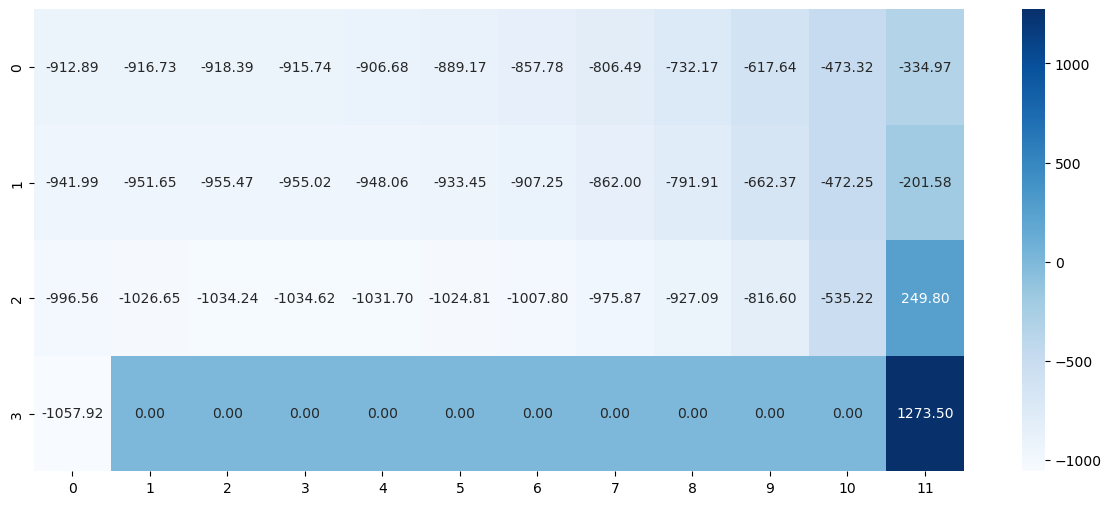

In [9]:
vi_pi_s = calculate_state_values(cliff_grid_world , weights)

plt.figure(figsize=(15, 6))
sns.heatmap(vi_pi_s, annot=True, fmt=".2f", cmap="Blues")
plt.show()

### 6. approx/baird – Baird’s counterexample.
Explain Baird’s counterexample in [1, Section 11.2] in detail.

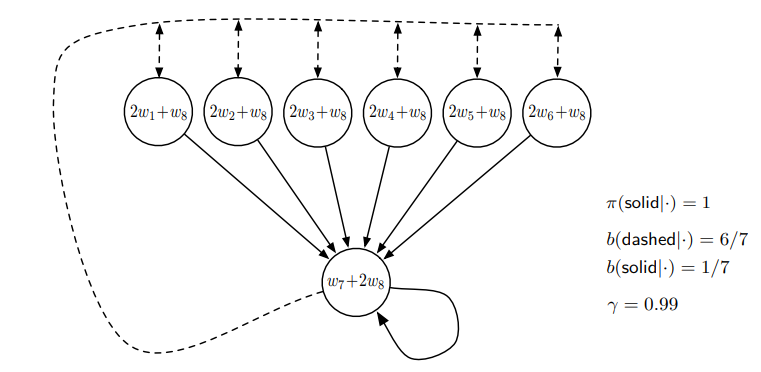

We have 7 states and 2 actions. If we take dashed action, it will always leave us in upper states, if we take solid action it will always leave us in lower state. We have two policies one from which is behaviorial policy $b$ and other is target policy $\pi$. Now, let target policy always take solid action (i.e. it chooses solid action with probability 1) and let behaviorial policy take dashed actions with probability 6/7 and take solid action with probability 1/7 (to be uniform with number of states). Lastly, let discount rate $\gamma$ be high, close to 1 and reward after each of the transition be 0.

Weight vector is defined as instance of set $\mathbb{R^8}$, with feature vectors (based on image) that are also instances from $\mathbb{R^8}$, one of which is $x(1) = [2, 0, 0, 0, 0, 0, 0, 1]$ 

Now since each reward is 0, optimal $v_\pi(s)$ should be 0 for each s and this would be true if $\mathcal{w = 0}$. However, if we apply semi-gradient TD(0) method to find weights, they all diverge in the end however small step size is. It has also been occuring even with expected updates like in DP. Opposed to that, if we do on policy learning, we could converge to right values. It's because off-policy always chases solid line so expected updates do not form a contraction mapping under the off-policy distribution. 

from lecture - be careful with function approximation

### 7. approx/tsitsiklisvanroy – Tsitsiklis and Van Roy’s counterexample.
Explain Tsitsiklis and Van Roy’s counterexample in [1, Section 11.2] in detail.

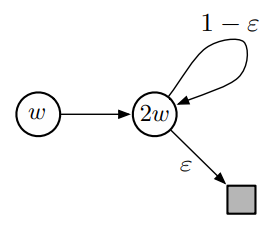

Here we have extension of a case that was at start of the chapter, where we had only 2 states which had estimated values of functional form $w$ and $2w$ and transition from state 1 to state 2 yields reward 0. Now we have extended case, that is if we are in state 2, with probability $1 - \epsilon$ we stay in state 2, and with probability $\epsilon$ we move to terminal state, with each transition yielding reward 0, again. Like in last value, true values would be 0 which brings us to optimal $w = 0$. If we want to minimize $\bar{VE}$ between estimated value and expected one step return we would have update:
\begin{align*}
    w_{k + 1} &= \argmin_{w \in \mathbb{R}} \sum_{s \in \mathbb{S}} (\hat{v}(s, w) - \mathbb{E_\pi}[R_{t + 1} + \gamma \hat{v}(S_{t + 1}, w_k)|S_t = s]) \\
              &= \frac{6 - 4\epsilon}{5} \gamma w_k
\end{align*}

This diverges if $\gamma > \frac{5}{6 - 4\epsilon}$ and $w_k \neq 0$.

### 8. error/ex112 – S&B Example 11.2: A-split example, showing the naiveté of the naive residual-gradient algorithm.
Explain [1, Example 11.2] in detail.

Main problem in following example is to show that naive residual-gradient algorithm doesn't always converge to desirable place. Let us have 3-state episodic MPD as shown in following image:

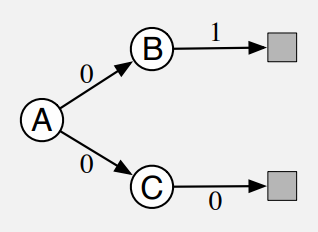

We denote same probability for going from A to B and from A to C. Also, we can take $\gamma = 1$ since it is an episodic problem.

Now, the true values for each of these states should be $v(A) = \frac{1}{2}$, $v(B) = 1$ and $v(C) = 0$. But if we run naive residual-gradient algorithm on this setup, we get different state values: $v(A) = \frac{1}{2}$, $v(B) = \frac{3}{4}$ and $v(C) = \frac{1}{4}$. 

Since we took $\gamma = 1$, we can say that changes that were yielded from transitions are TD errors. Therefore, after first transition we have TD error of $\pm \frac{1}{4}$, and same is for the second transition. If we square these transitions and find mean of it we would get $\frac{1}{16}$.

Above was analysis on naive residual-gradient values, now we can calculate mean squared TD error for true values. After first transition, we would have TD error of $\pm \frac{1}{2}$, which squared is $\frac{1}{4}$. Second transition would always bring 0 TD error. Therefore, mean squared TD error for true values is $\frac{1}{8}$, which is higher than $\frac{1}{16}$, so we showed here that naive residual-gradient algorithm actually minimizes mean squared TD error, but that isn't always optimal. 

### 9. error/ex113 – S&B Example 11.3: A-presplit example, a counterexample for the mean squared Bellman error.
Explain [1, Example 11.3] in detail.

Similar setup as in last example, but now episodes start either in A1 or A2 (with equal probability):

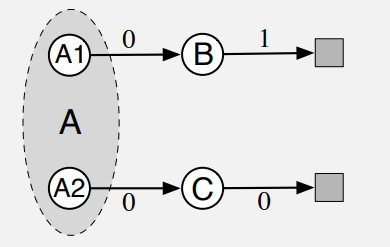

These states A1 and A2 look same to the function approximator, specifically we have three components, first component is shared between A1 and A2, second is for B and third is for C. True values again are $v(A1) = v(A2) = \frac{1}{2}$, $v(B) = 1$ and $v(C) = 0$ since algorithm doesnt distinguish A1 and A2.

Similarly to example before, and because the current setup externally looks like previous one, we know that semi-gradient TD will converge to correct, true values and naive residual-gradient would converge to $v(A1) = v(A2) = \frac{1}{2}$, $v(B) = \frac{3}{4}$ and $v(C) = \frac{1}{4}$. Since transitions are deterministic, this means that non-naive algorithm will also converge to these same values. Therefore, since they are both same algorithm now, it would mean that naive solution also minimizes mean squared Bellman error, which in this deterministic case is same as mean squared TD error. In the end, residual-gradient fails at same place that naive residual-gradient in A-split.  

### 10. error/ex114 – S&B Example 11.4: counterexample to the learnability of the Bellman error. 
Explain [1, Example 11.4] in detail.

The counterexample shows that Bellman error is not learnable quantity from data alone.

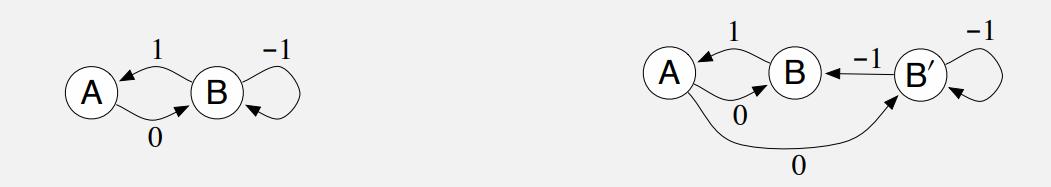

If we externally observe data distribution, we couldn't distinguish between those two MDPs, feature vectors are having 2 components, one for A, one for B/B'. Similarly to last example we have equal probabilities of changing states if there is 2 actions from a state. Furthermore, in right MDP we have just one subtle difference which is uniformity in time spent in each of the states A, B, B'. 

Now, if we put in left MDP $v(A) = 0$ and $v(B) = 0$ (same probability for each transition - expected 0), there will be bellman error of 0 if we take w to be zero vector.

If we try to do the same right MDP, we have $v(A) = 0, v(B) = v(B') = 0$, but now we would have a problem because we get different bellman error in the end. Furthermore, for each transition B/B' we would get TD error of $\delta = \pm 1$ which is squared 1, so it gives us in the end:
\begin{equation*}
    BE(0) = \frac{1}{3} 1 + \frac{1}{3} 1 = \frac{2}{3}
\end{equation*}

which is different than BE in left MDP. Since we got different bellman error from same output data distribution, bellman error is not learnable quantity. 